In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
source('../00_preprocessing/preprocessing.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuan

In [4]:
seurat_obj = qs::qread('/scratch/nmq407/exp_04_labelled.qs')
seurat_obj

An object of class Seurat 
58800 features across 143931 samples within 3 assays 
Active assay: integrated (3434 features, 3434 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [11]:
genes_stat = qs::qread('genes_stat.qs')
genes = genes_stat$gene

In [12]:
genes 

[1] "Nfia"               "Trpm3"              "Nrxn3"             
  [4] "Erbb4"              "Cntn5"              "Il1rapl2"          
  [7] "Rbfox1"             "Kcnip4"             "Gpc6"              
 [10] "Galntl6"            "Zfp804b"            "Lingo2"            
 [13] "Cntn4"              "Nxph1"              "Pcdh9"             
 [16] "Pde10a"             "Adarb2"             "Nrg1"              
 [19] "ENSMUSG00000108532" "Ptprt"              "Col25a1"           
 [22] "Kirrel3"            "Sgcz"               "Robo1"             
 [25] "Mgat4c"             "Prr16"              "Sorcs1"            
 [28] "Inpp5d"             "Sgcd"               "Ncam2"             
 [31] "Egfem1"             "Fgf13"              "Nkain2"            
 [34] "Ptprk"              "Kctd16"             "Slit2"             
 [37] "Plcl1"              "ENSMUSG00000118257" "Pcdh11x"           
 [40] "Hs3st4"             "Inpp4b"             "Dcc"               
 [43] "Grm8"               "ENSMUSG00000110246" "Pcdh7"             
 [46] "Rtl4"               "St18"               "Cadm2"             
 [49] "Luzp2"              "Grm7"               "ENSMUSG00000075020"
 [52] "Cpne4"              "Epha6"              "Rmst"              
 [55] "ENSMUSG00000109907" "Pde4b"              "Fstl4"             
 [58] "Zfhx3"              "Eda"                "Auts2"             
 [61] "Tox"                "Slco1a4"            "Pcdh15"            
 [64] "Mobp"               "Slc1a2"             "Spag16"            
 [67] "Pdzrn3"             "Kcnq5"              "Rgs6"              
 [70] "Tenm3"              "Frmpd4"             "Sv2c"              
 [73] "Zbtb20"             "Zfp804a"            "Ntrk2"             
 [76] "Shc3"               "Grik3"              "Lrrtm4"            
 [79] "Arhgap6"            "Prr5l"              "Kcnq3"             
 [82] "Col23a1"            "Tmem212"            "Alcam"             
 [85] "Tmcc3"              "Brinp3"             "P3h2"              
 [88] "4930555F03Rik"      "Sdk1"               "Dscaml1"           
 [91] "Gpc5"               "Slc7a11"            "Opcml"             
 [94] "Zbtb16"             "Rorb"               "Kctd8"             
 [97] "Ipw"                "Ntng1"              "Chsy3"             
[100] "Dnah12"

In [18]:
seurat_obj@assays

$RNA
Assay data with 28887 features for 143931 cells
First 10 features:
 ENSMUSG00000089699, ENSMUSG00000104238, Lypla1, Tcea1, Atp6v1h, Oprk1,
Rb1cc1, Alkal1, St18, Pcmtd1 

$SCT
SCTAssay data with 26479 features for 143931 cells, and 3 SCTModel(s) 
First 10 features:
 ENSMUSG00000089699, ENSMUSG00000104238, Lypla1, Tcea1, Atp6v1h, Oprk1,
Rb1cc1, Alkal1, St18, Pcmtd1 

$integrated
SCTAssay data with 3434 features for 143931 cells, and 1 SCTModel(s) 
Top 10 variable features:
 Gpc5, Slc4a4, St18, ENSMUSG00000108532, Il1rapl2, Trpm3, Col25a1,
Col23a1, Adarb2, Slc1a2 


In [20]:
DefaultAssay(seurat_obj) =  'RNA'

In [21]:
DefaultAssay(seurat_obj)

[1] "RNA"

In [24]:
subset.matrix <- seurat_obj@assays$RNA@counts[genes,] # Pull the raw expression matrix from the original Seurat object containing only the genes of interest
object2 <- CreateSeuratObject(subset.matrix) # Create a new Seurat object with just the genes of interest
object2 <- AddMetaData(object = object2, metadata = seurat_obj@meta.data) # Add the idents to the meta.data slot

In [25]:
object2 = sc_transform_fgf1(object2)

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 100

Total overdispersed genes: 100

Excluding 0 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 100 by 143931

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 100 genes, 5000 cells



  |======================================================================| 100%


Setting estimate of  0 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 0

Total # of Step1 poisson genes (theta=Inf; variance < mean): 0

Total # of poisson genes (theta=Inf; variance < mean): 0

Calling offset model for all 0 poisson genes

Ignoring theta inf genes

Replacing fit params for 0 poisson genes by theta=Inf

Setting min_variance based on median UMI:  4.84

Second step: Get residuals using fitted parameters for 100 genes



  |======================================================================| 100%


Computing corrected count matrix for 100 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 11.9523 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity"
Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
15:26:28 UMAP embedding parameters a = 0.9922 b = 1.112

15:26:28 Read 143931 rows and found 30 numeric columns

15:26:28 Using Annoy for neighbor search

In [27]:
2

[1] 2

In [28]:
object2

An object of class Seurat 
200 features across 143931 samples within 2 assays 
Active assay: SCT (100 features, 100 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



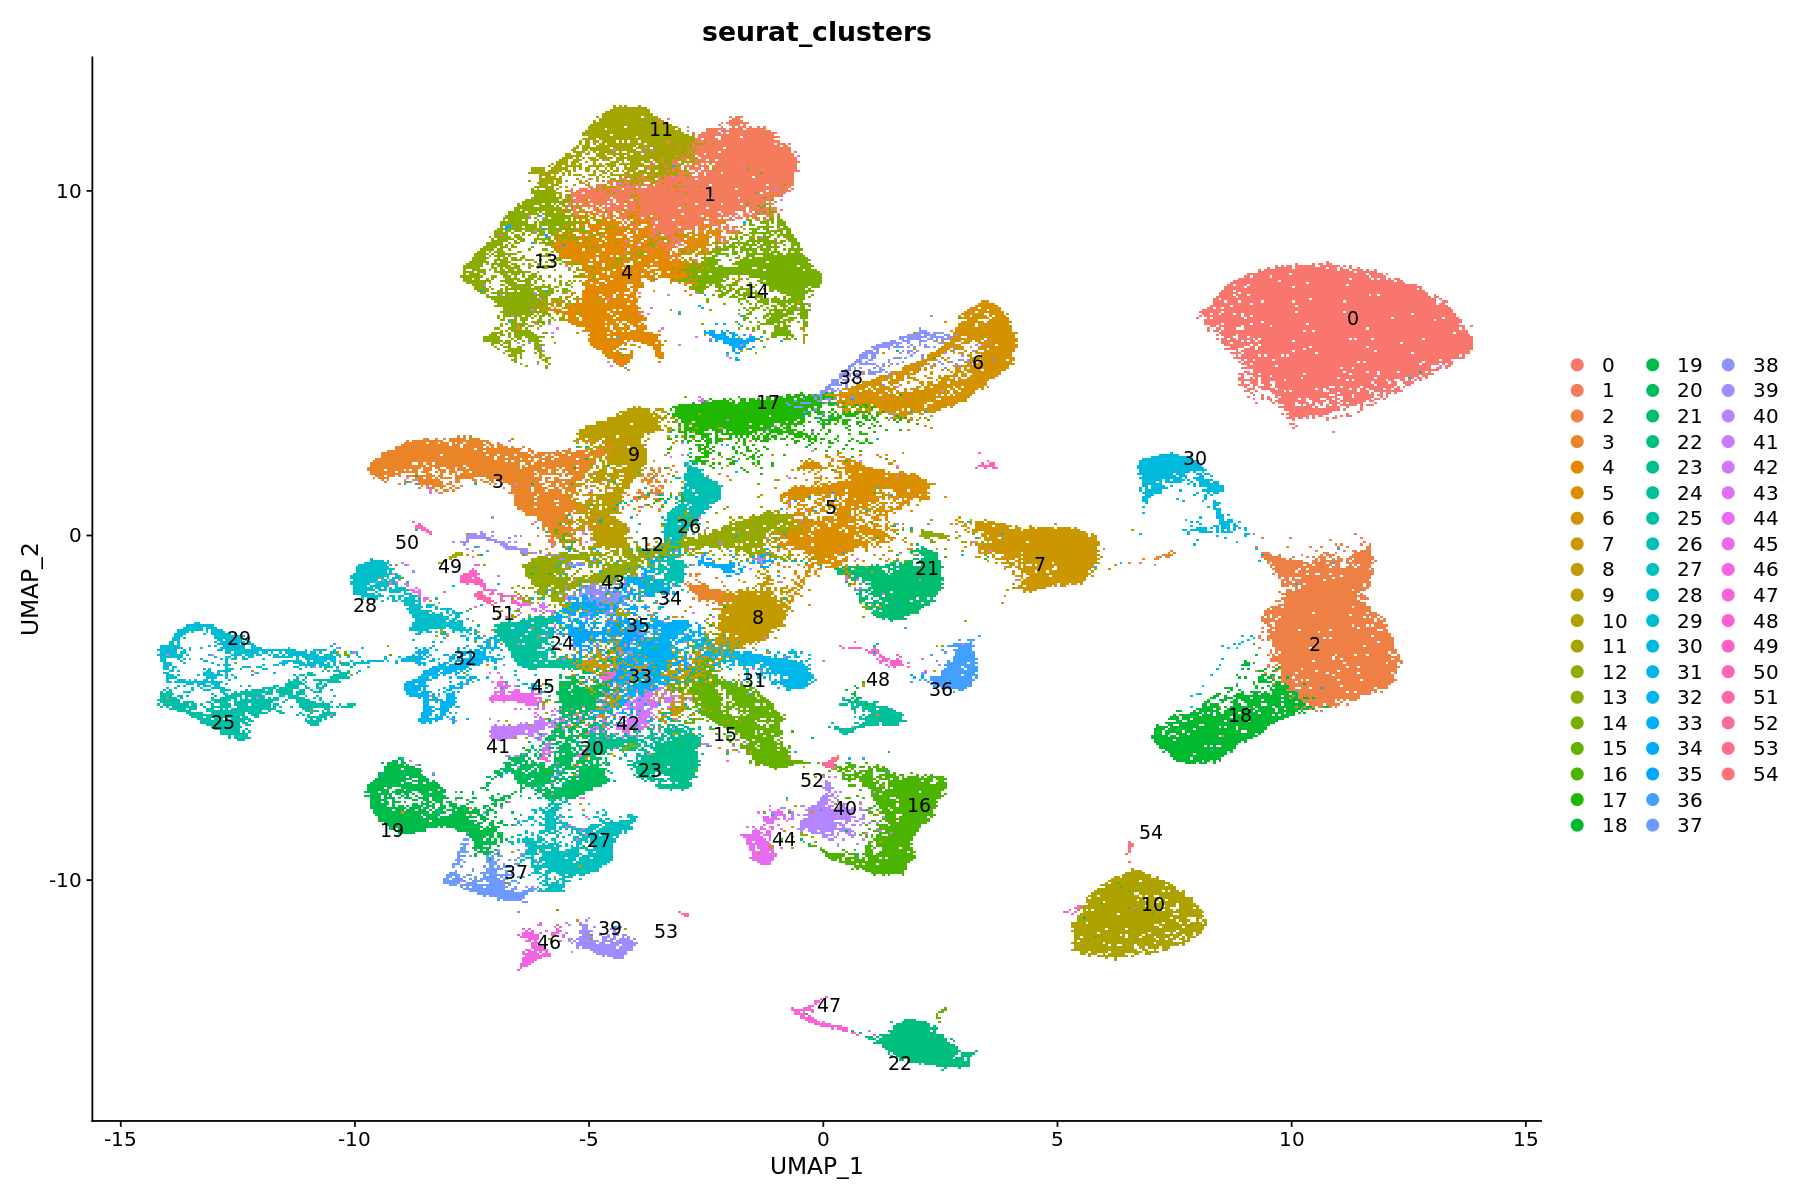

In [30]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(object2, reduction = "umap", group.by = "seurat_clusters", label = TRUE,  repel = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



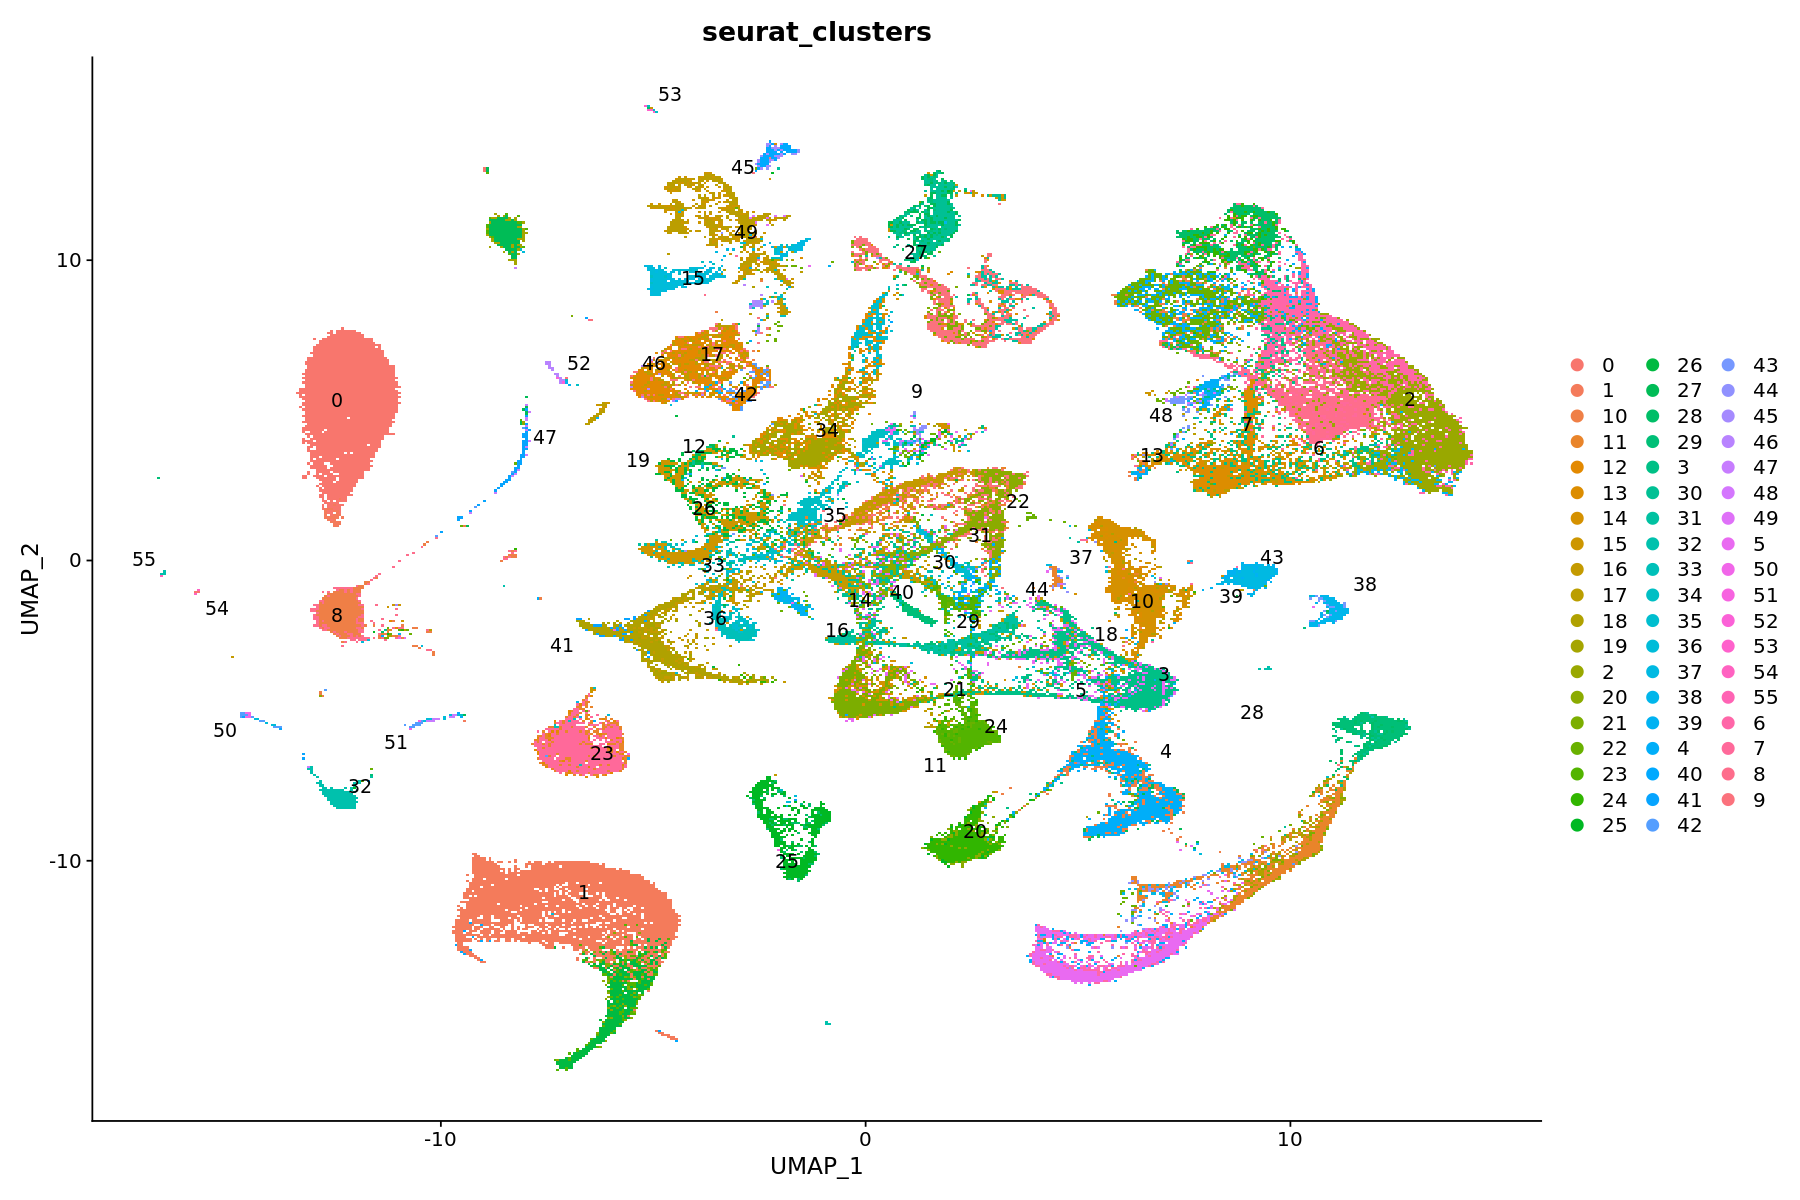

In [45]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(seurat_obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE,  repel = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


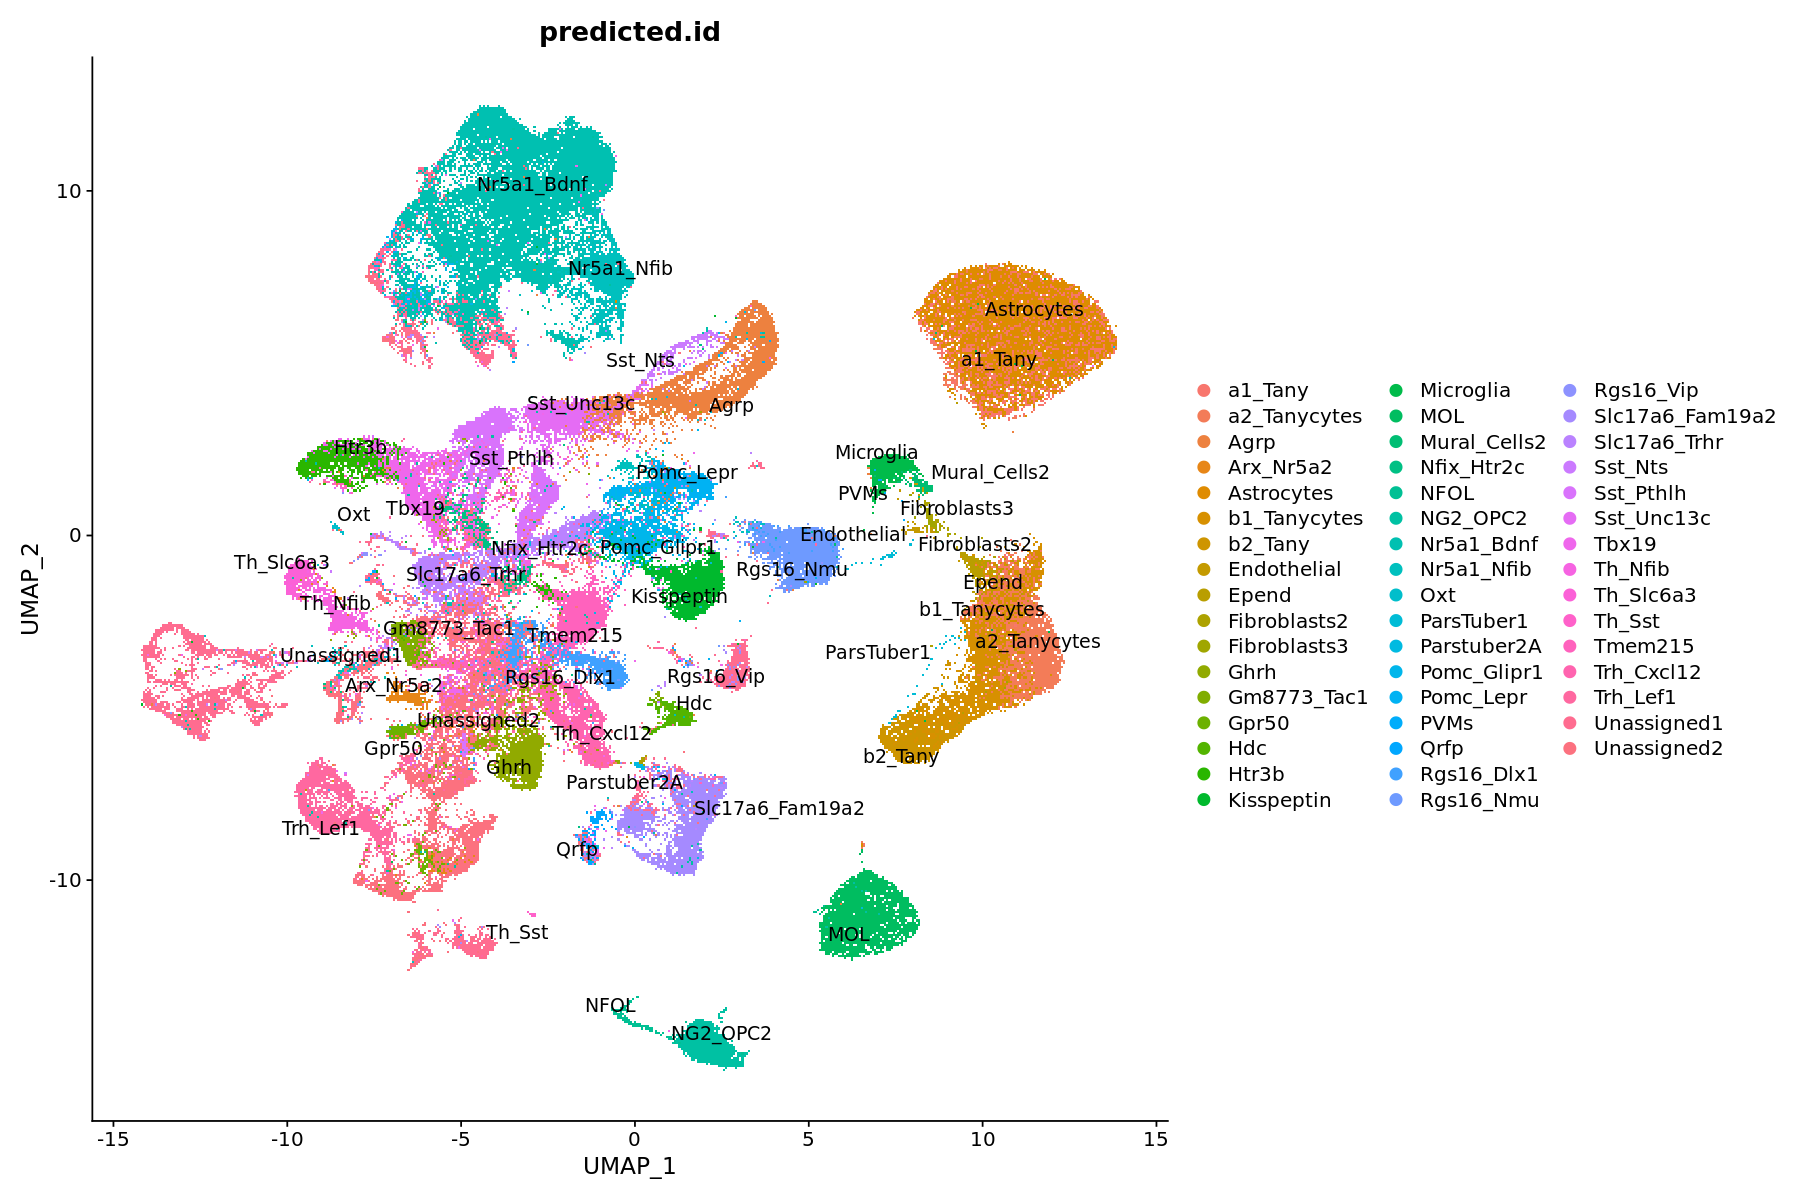

In [37]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(object2, reduction = "umap", group.by = "predicted.id", label = TRUE,  repel = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


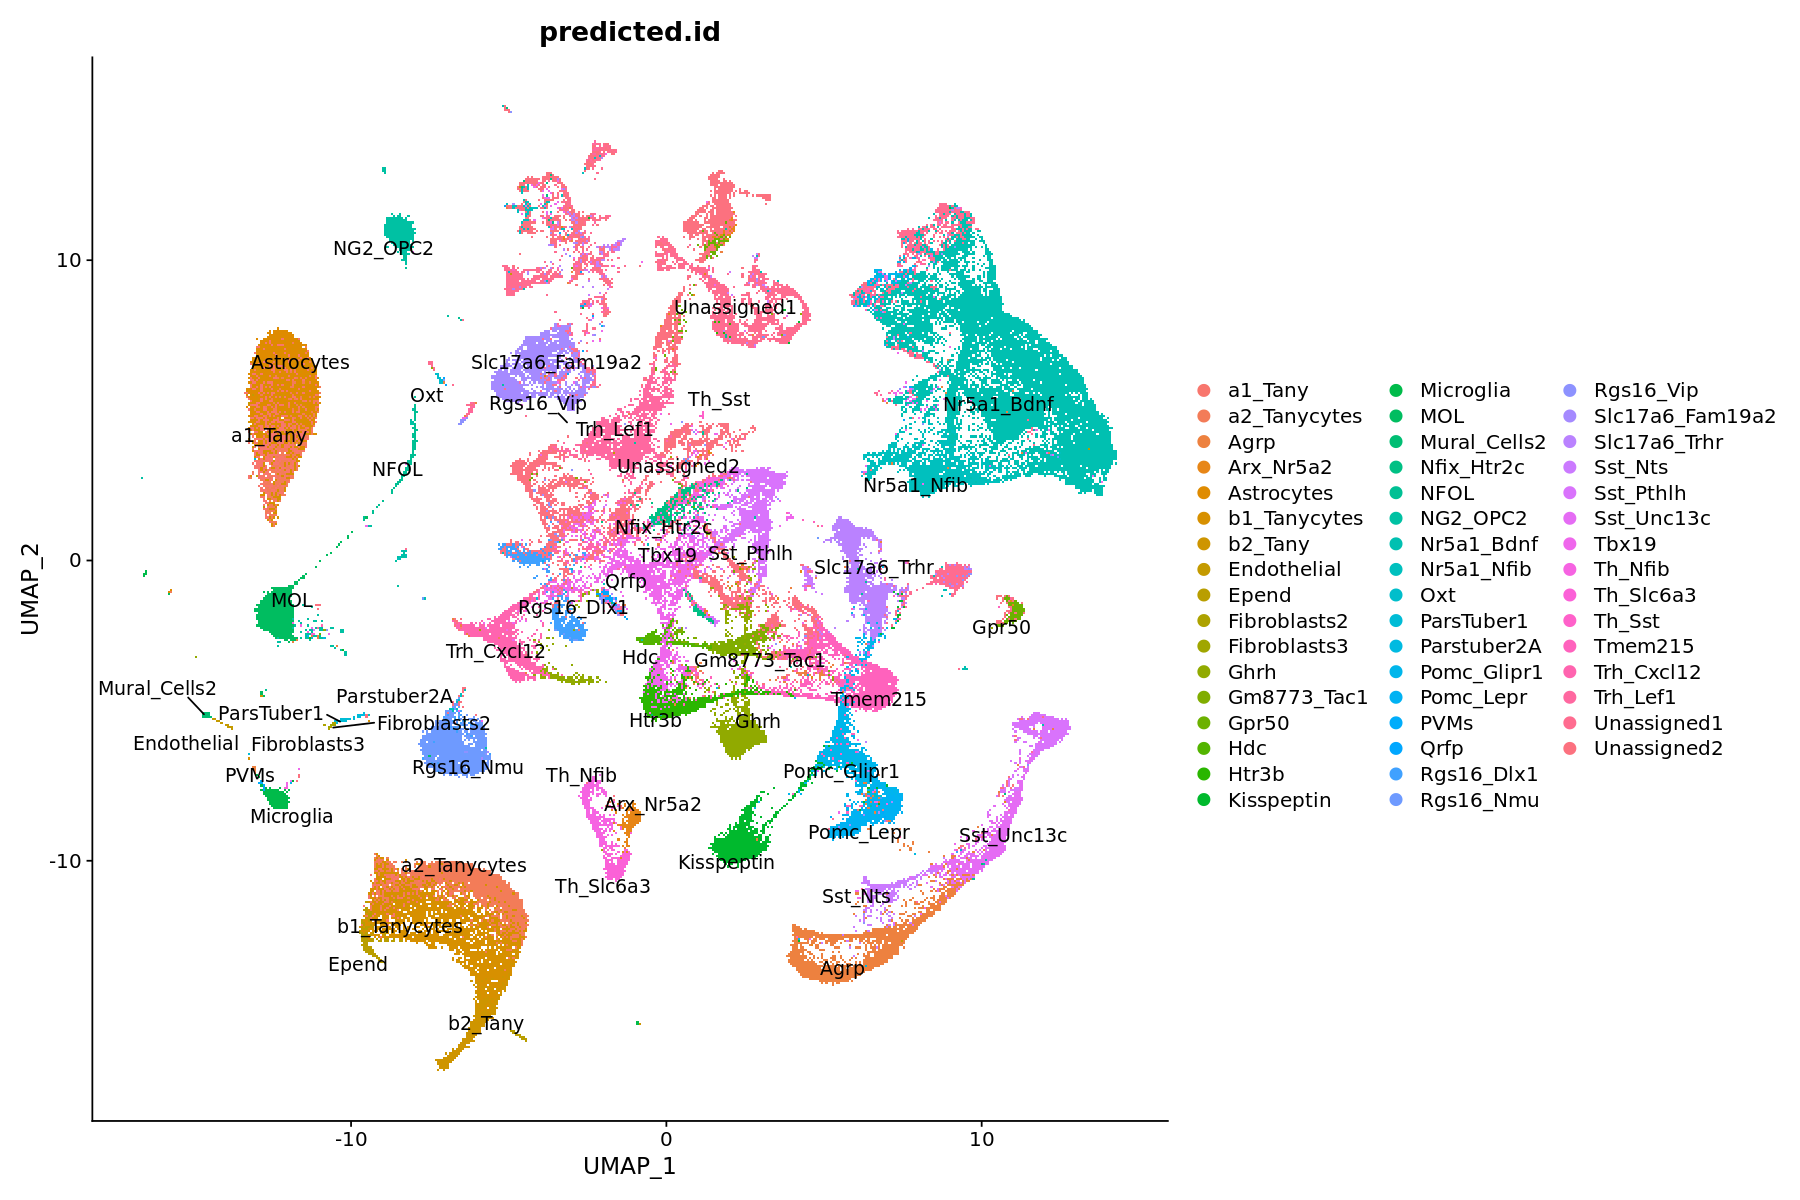

In [39]:
options(repr.plot.width=15, repr.plot.height=10)
DimPlot(seurat_obj, reduction = "umap", group.by = "predicted.id", label = TRUE,  repel = TRUE)

In [44]:
levels(seurat_obj@meta.data$labels)

[1] "Nr5a1_Bdnf"                "Agrp"                     
 [3] "Tmem215"                   "Rgs16_Nmu"                
 [5] "Htr3b"                     "Slc17a6_Fam19a2"          
 [7] "Pomc_Glipr1-Slc17a6_Trhr"  "Sst_Unc13c-Agrp"          
 [9] "Nr5a1_Nfib"                "Trh_Cxcl12"               
[11] "Kisspeptin"                "Trh_Lef1"                 
[13] "Pomc_Lepr"                 "Unassigned2"              
[15] "Unassigned1"               "Ghrh"                     
[17] "Slc17a6_Trhr"              "Sst_Pthlh"                
[19] "Nr5a1_Bdnf-Unassigned1"    "Tbx19"                    
[21] "Nfix_Htr2c"                "Gm8773_Tac1-Hdc"          
[23] "Rgs16_Dlx1-Unassigned2"    "Th_Nfib-Arx_Nr5a2"        
[25] "Rgs16_Dlx1"                "Nr5a1_Bdnf-Nr5a1_Nfib"    
[27] "Th_Slc6a3"                 "Sst_Nts"                  
[29] "Gpr50"                     "Qrfp"                     
[31] "Unassigned2-Unassigned1"   "Sst_Pthlh-Ghrh"           
[33] "Oxt-Unassigned1"           "Unassigned2-Rgs16_Vip"    
[35] "Astrocytes"                "a1_Tany-Astrocytes"       
[37] "MOL"                       "a2_Tanycytes"             
[39] "NG2_OPC2"                  "a2_Tanycytes-b1_Tanycytes"
[41] "b1_Tanycytes"              "b2_Tany"                  
[43] "Microglia"                 "Epend"                    
[45] "NG2_OPC2-Microglia"        "NFOL"                     
[47] "Mural_Cells2"              "Fibroblasts2-Fibroblasts3"
[49] "Parstuber2A-ParsTuber1"    "Endothelial"              
[51] "MOL-a2_Tanycytes"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



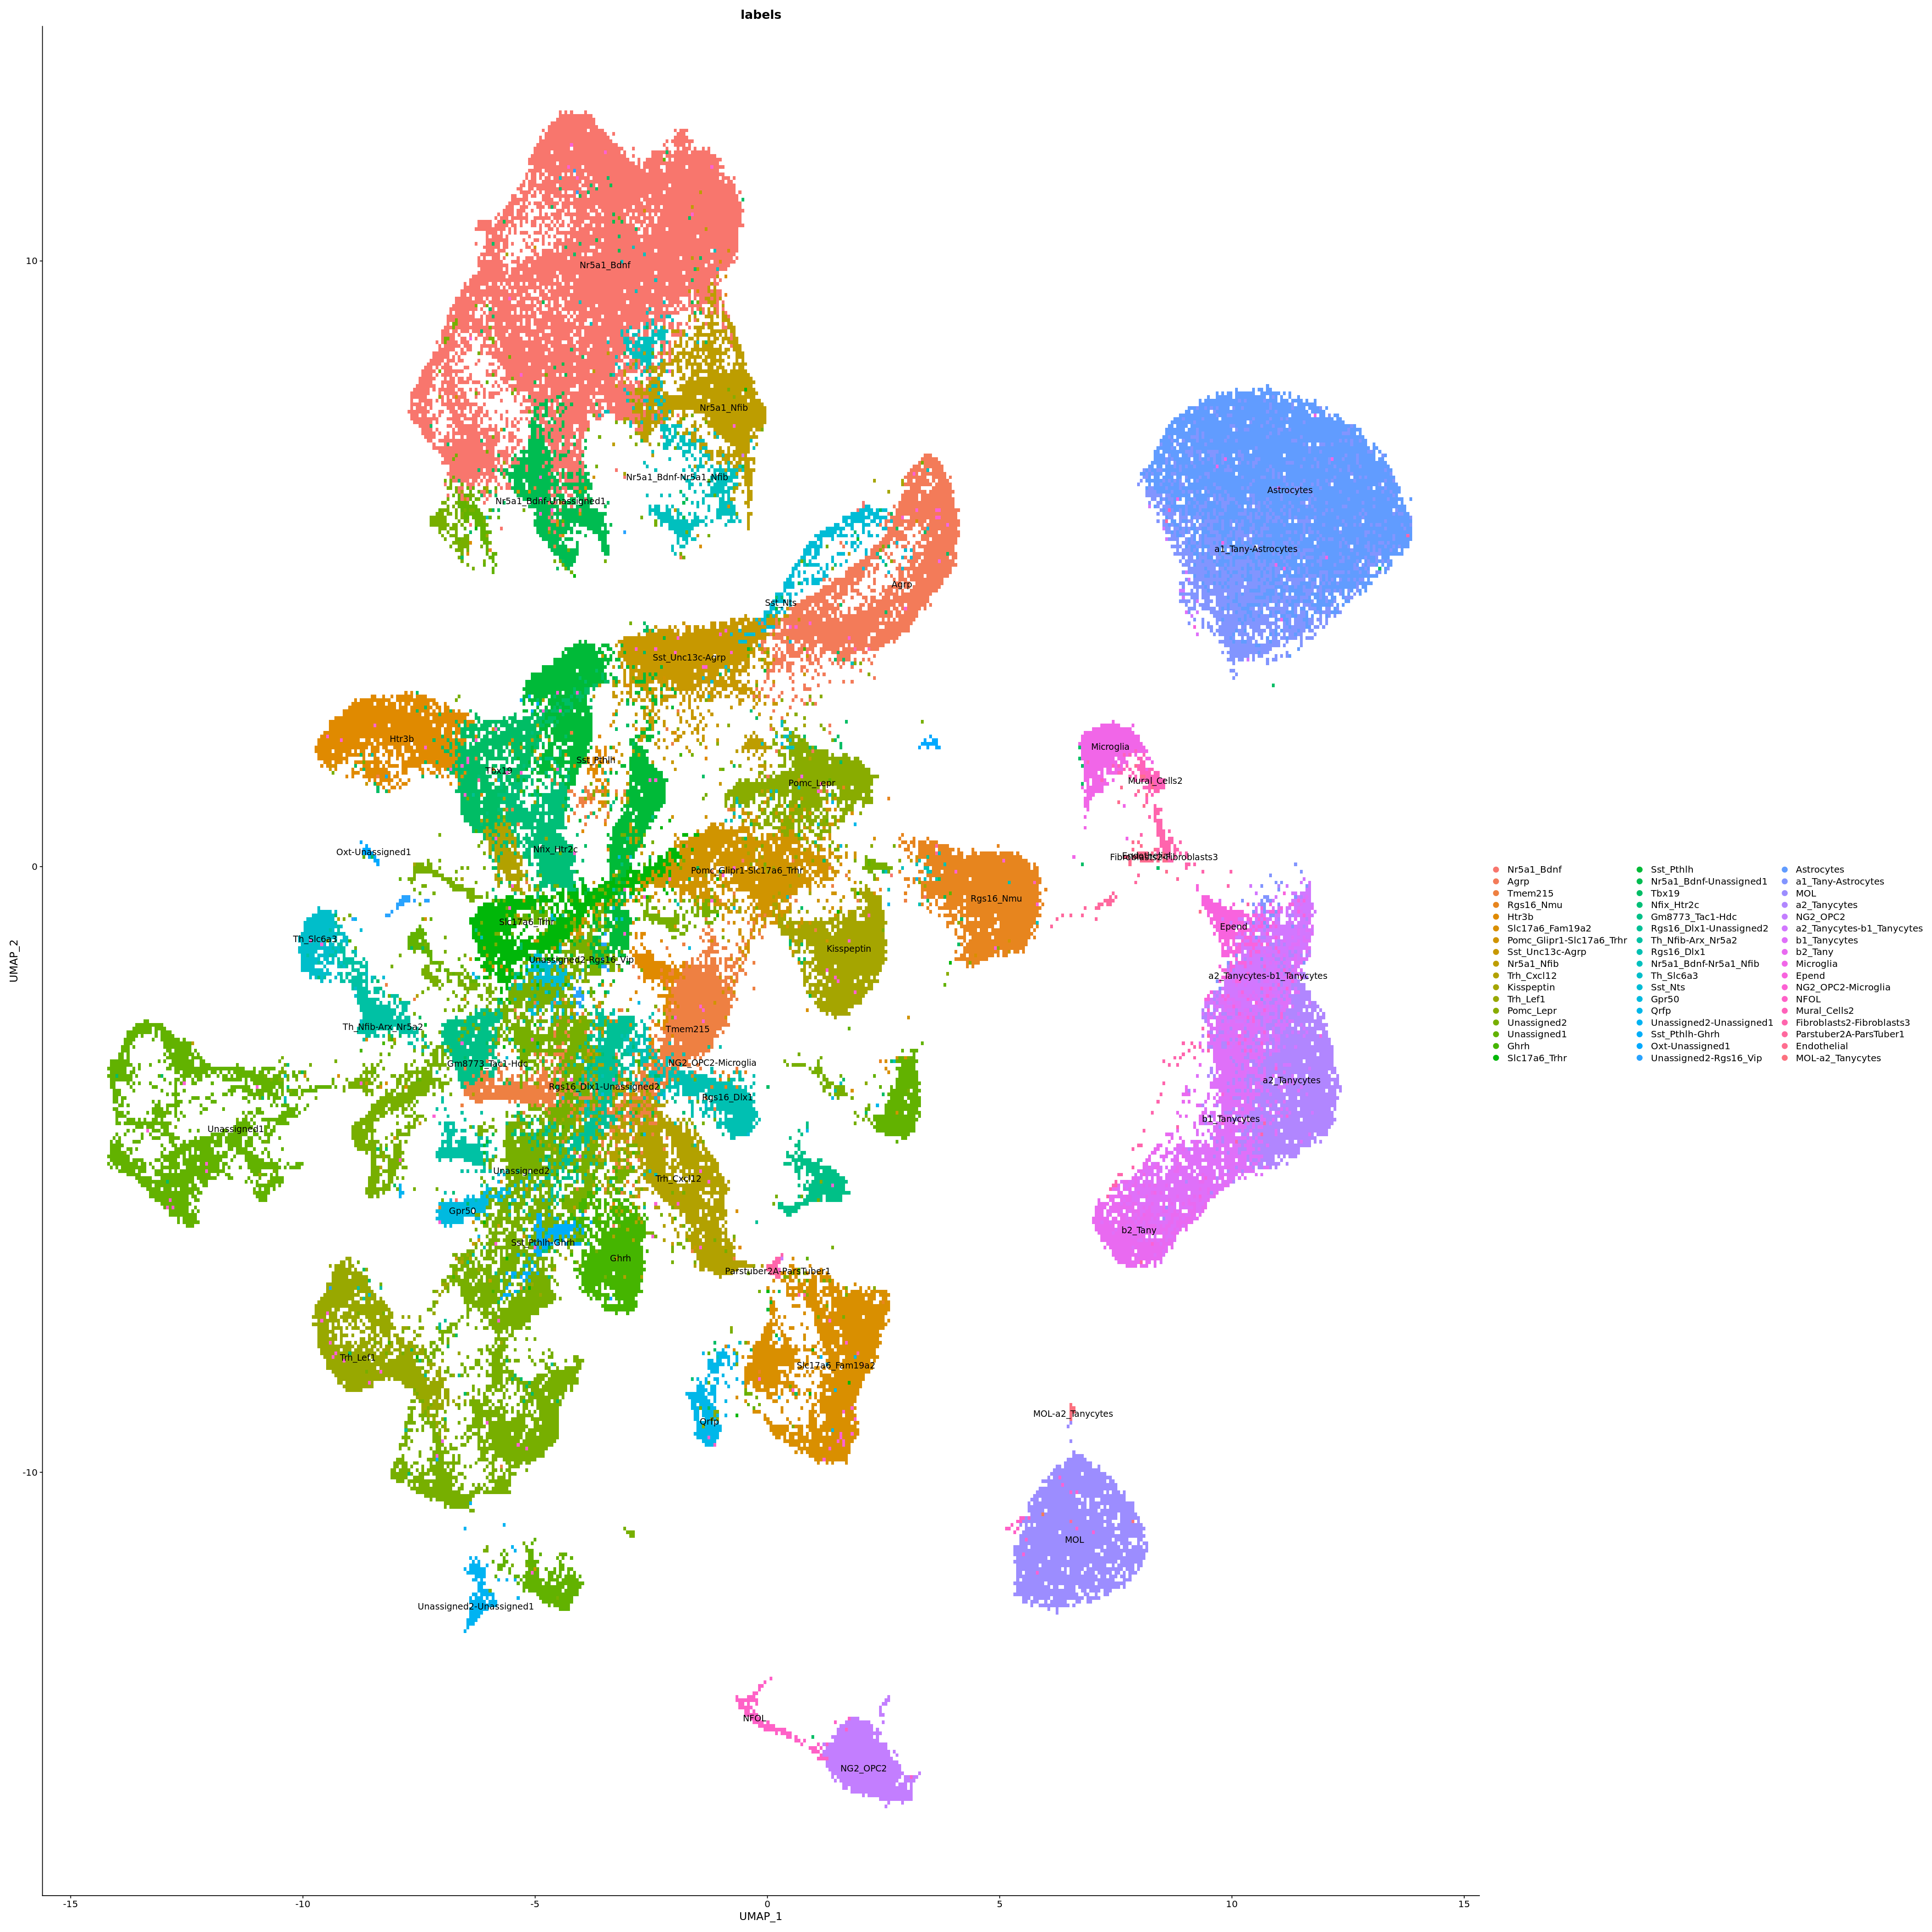

In [56]:
options(repr.plot.width=35, repr.plot.height=35)
DimPlot(object2, reduction = "umap", group.by = "labels", label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



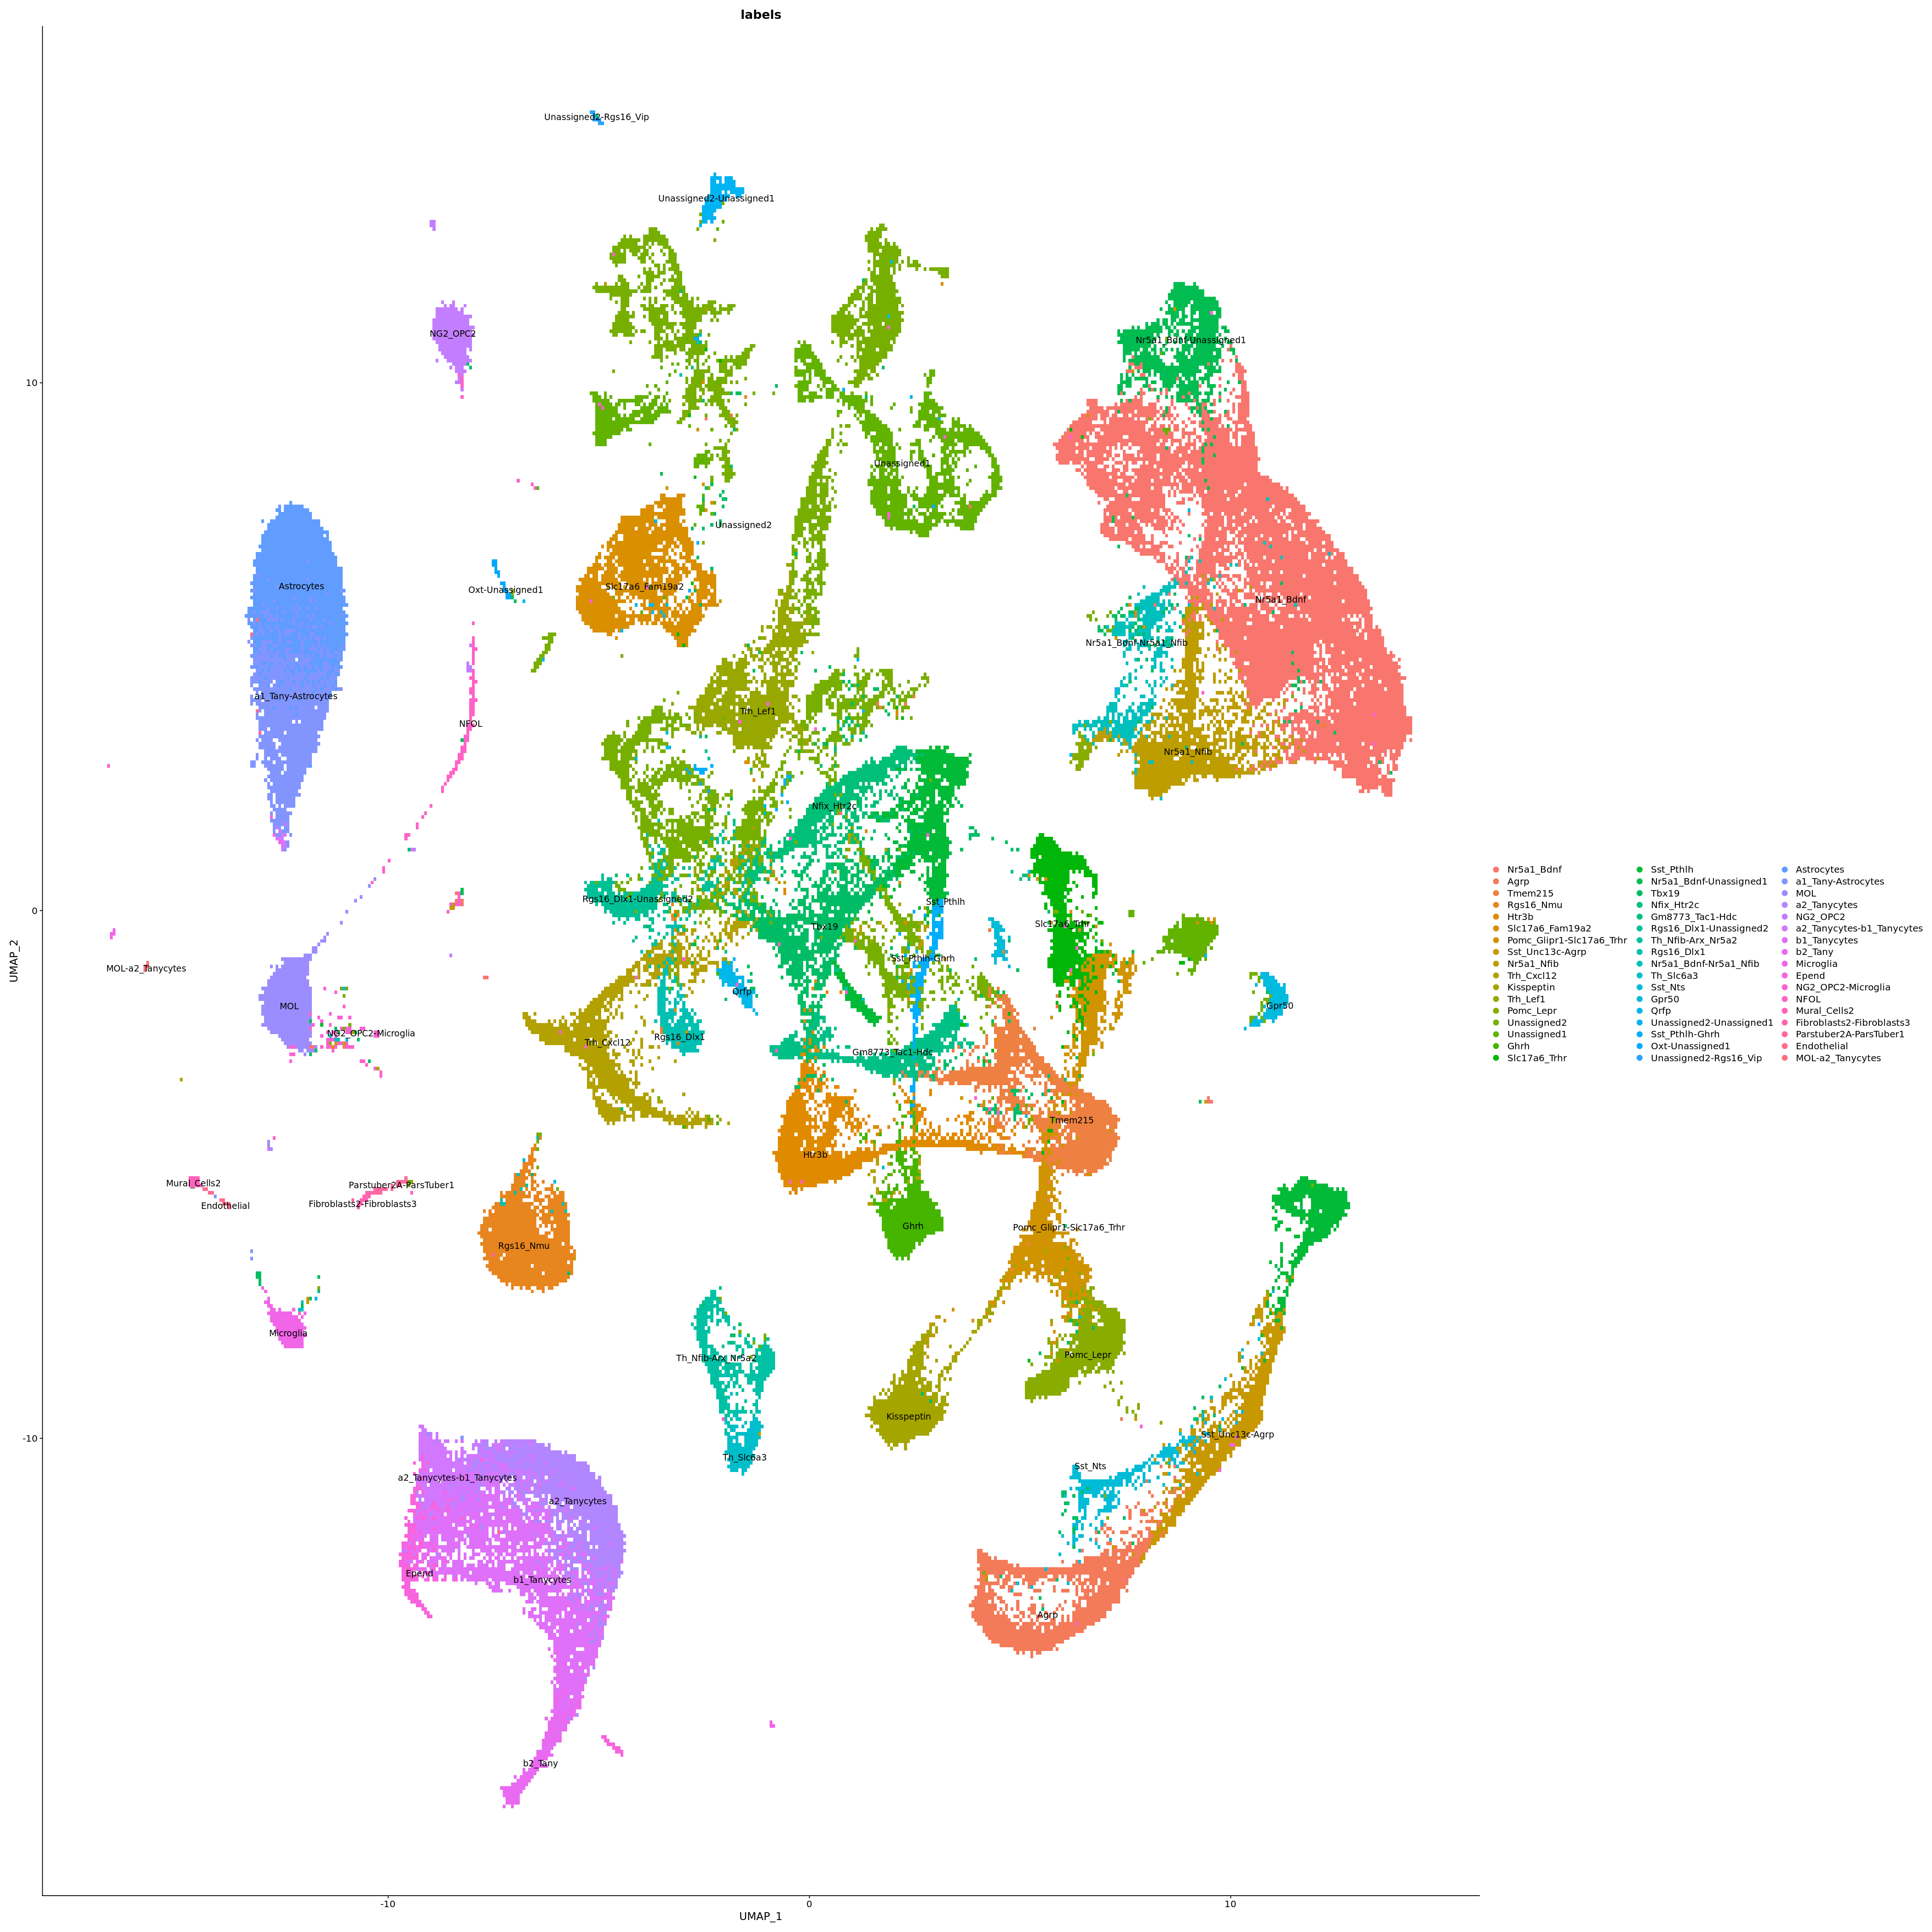

In [57]:
options(repr.plot.width=35, repr.plot.height=35)
DimPlot(seurat_obj, reduction = "umap", group.by = "labels", label = TRUE)